In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from qutip import Bloch
from qutip.ipynbtools import plot_animation

In [20]:
data_dir = "./02_Bloch"

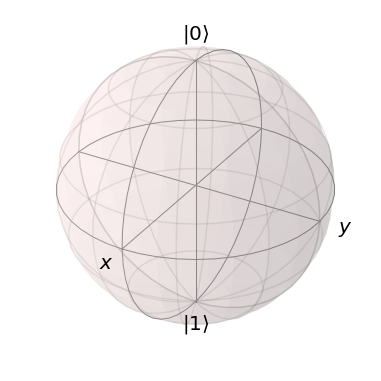

In [24]:
b = Bloch()
b.show()
b.save(data_dir+"/empty_Bloch.png")

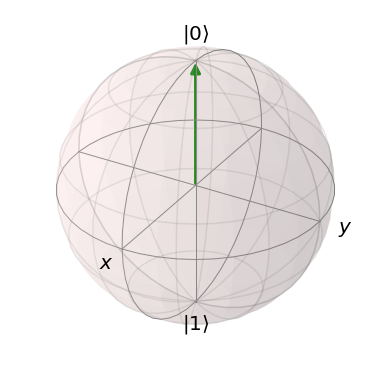

In [28]:
b = Bloch()
pnt = [0,0,1]
b.add_vectors(pnt)
b.show()
b.save(data_dir+"/Bloch_zvector.png")

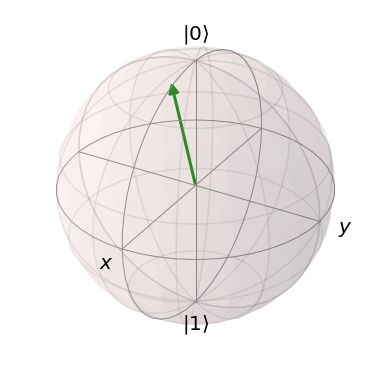

In [33]:
b = Bloch()
pnt = [-1/2,-1/2,1/2]
b.add_vectors(pnt)
b.show()
b.save(data_dir+"/Bloch_vector2.png")

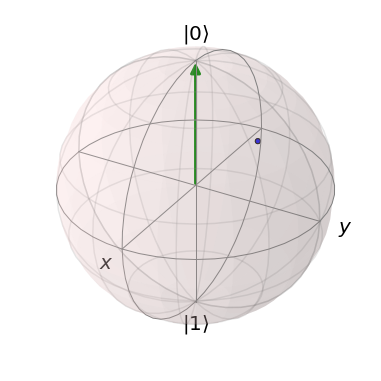

In [35]:
b = Bloch()
pnt = [0,0,1]
b.add_vectors(pnt)
pnt = [0,1/2,1/2]
b.add_points(pnt)
b.show()
b.save(data_dir+"/Bloch_vec_poi.png")

In [58]:
test = "test"

In [62]:
len(test)

4

In [61]:
test[1:4]

'est'

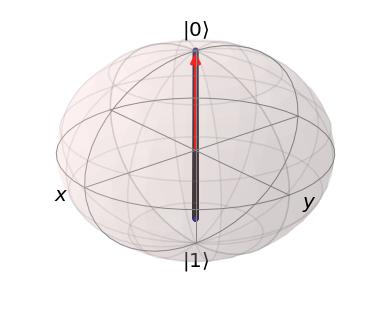

<Figure size 360x360 with 0 Axes>

In [68]:
from qutip import *
from scipy import *
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = sigmax(); sy = sigmay(); sz = sigmaz(); sm = sigmam()
    H = w * (cos(theta) * sz + sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(sqrt(rate) * sz)


    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])  
    return output.expect[0], output.expect[1], output.expect[2]
    
## calculate the dynamics
w     = 1.0 * 2 * pi   # qubit angular frequency
theta = 0 * pi       # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5      # qubit relaxation rate
gamma2 = 0.2      # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a* basis(2,0) + (1-a)*basis(2,1))/(sqrt(a**2 + (1-a)**2))
tlist = linspace(0,4,250)
#expectation values for ploting
sx, sy, sz = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

    
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = figure(figsize=(5, 4))
ax = Axes3D(fig,azim=-40,elev=30)
sphere = Bloch(axes=ax)

def animate(i):
    sphere.clear()
    sphere.add_vectors([np.sin(theta),0,np.cos(theta)])
    sphere.add_points([sx[:i+1],sy[:i+1],sz[:i+1]])
    sphere.make_sphere()
    return ax

def init():
    sphere.vector_color = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(sx)),
                            init_func=init, repeat=False)
ani.save('bloch_sphere.mp4', fps=20)